In [94]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import seaborn as sns
import requests #통신연결

### 사기

In [98]:
def userUrl(): #범죄
  url = "https://api.odcloud.kr/api/3074459/v1/uddi:caf0f7cf-8b8b-4fff-a94d-8bb2a84d5b61?page=1&perPage=38&serviceKey=%2BzvPpGbiuQkkpMUop%2FJ7Ehwhf6IbfALnY6a85bYwFQimNT4pWPXxd11SHjm8bGbyuyKNFQNAOCpC%2F6vimhjfLg%3D%3D"
  return url

url = userUrl()
response = requests.get(url)
criminal_db = json.loads(response.content)
place_list = criminal_db["data"]

df0 =pd.DataFrame(place_list, columns=["범죄중분류","03시00분-05시59분","06시00분-08시59분","09시00분-11시59분","0시00분-02시59분","12시00분-14시59분","15시00분-17시59분",
                                        "18시00분-20시59분","21시00분-23시59분","월","화","수","목","금","토","일"])

df1=df0[df0['범죄중분류']=='사기']



date = ["월","화","수","목","금","토","일"]
time = ["03시00분-05시59분","06시00분-08시59분","09시00분-11시59분","0시00분-02시59분","12시00분-14시59분","15시00분-17시59분",
                                        "18시00분-20시59분","21시00분-23시59분"]
Criminal_Time1=df1.drop(columns=date)
Criminal_Date1=df1.drop(columns=time)

display(Criminal_Time1)
display(Criminal_Date1)




,범죄중분류,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,0시00분-02시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분
23,사기,3949,3056,39184,5443,30405,21648,13930,12387


,범죄중분류,월,화,수,목,금,토,일
23,사기,52740,51876,51225,51654,52039,24124,20814


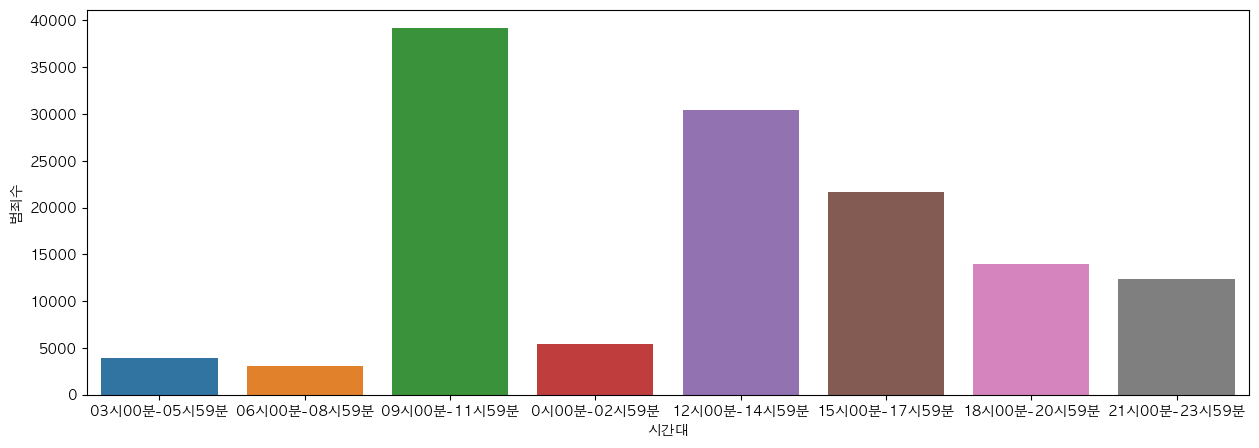

In [99]:

plt.rc("font", family="AppleGothic") #맥을 위한 폰트
plt.figure(figsize=(15,5))
sns.barplot(data=Criminal_Time1)
plt.xlabel("시간대")  
plt.ylabel("범죄수")
plt.show()



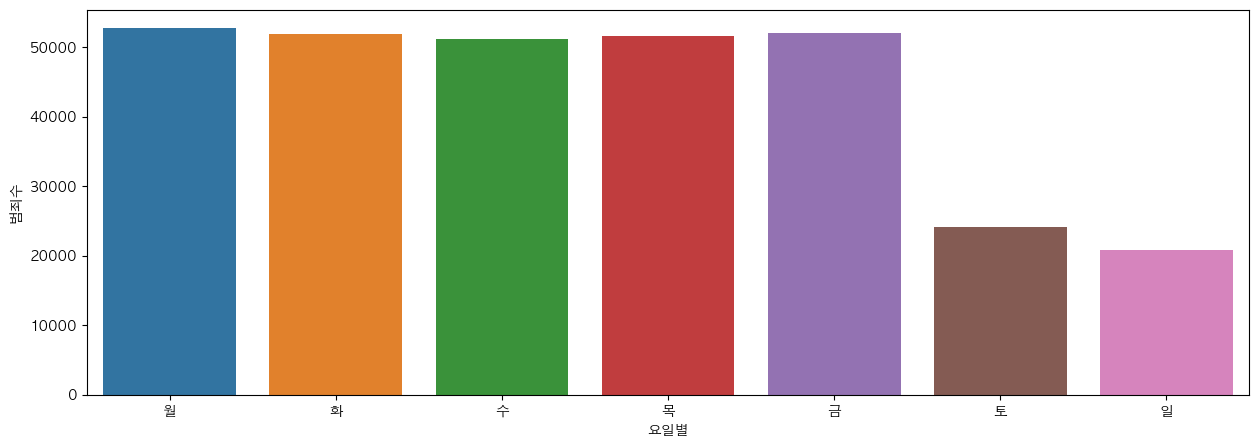

In [100]:
plt.rc("font", family="AppleGothic") #맥을 위한 폰트
plt.figure(figsize=(15,5))
sns.barplot(data=Criminal_Date1)
plt.xlabel("요일별")  
plt.ylabel("범죄수")
plt.show()

### 배임

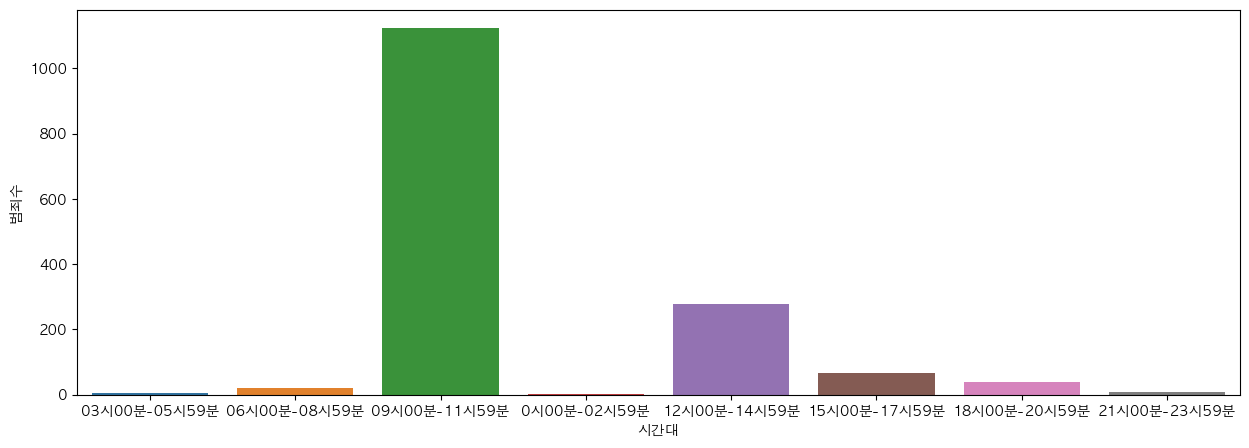

In [102]:
df2 = df0[df0['범죄중분류'] =='배임']

Criminal_Time2=df2.drop(columns=date)
Criminal_Date2=df2.drop(columns=time)

plt.rc("font", family="AppleGothic") #맥을 위한 폰트
plt.figure(figsize=(15,5))
sns.barplot(data=Criminal_Time2)
plt.xlabel("시간대")  
plt.ylabel("범죄수")
plt.show()


### 폭행

In [103]:
df3=df0[df0['범죄중분류']=='폭행']
date = ["월","화","수","목","금","토","일"]
time = ["03시00분-05시59분","06시00분-08시59분","09시00분-11시59분","0시00분-02시59분","12시00분-14시59분","15시00분-17시59분",
                                        "18시00분-20시59분","21시00분-23시59분"]
Criminal_Time3=df3.drop(columns=date)
Criminal_Date3=df3.drop(columns=time)

display(Criminal_Time3)
display(Criminal_Date3)

,범죄중분류,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,0시00분-02시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분
10,폭행,16377,9345,11591,19226,12509,14791,20704,34120


,범죄중분류,월,화,수,목,금,토,일
10,폭행,19966,20766,20981,21080,22045,26494,25865


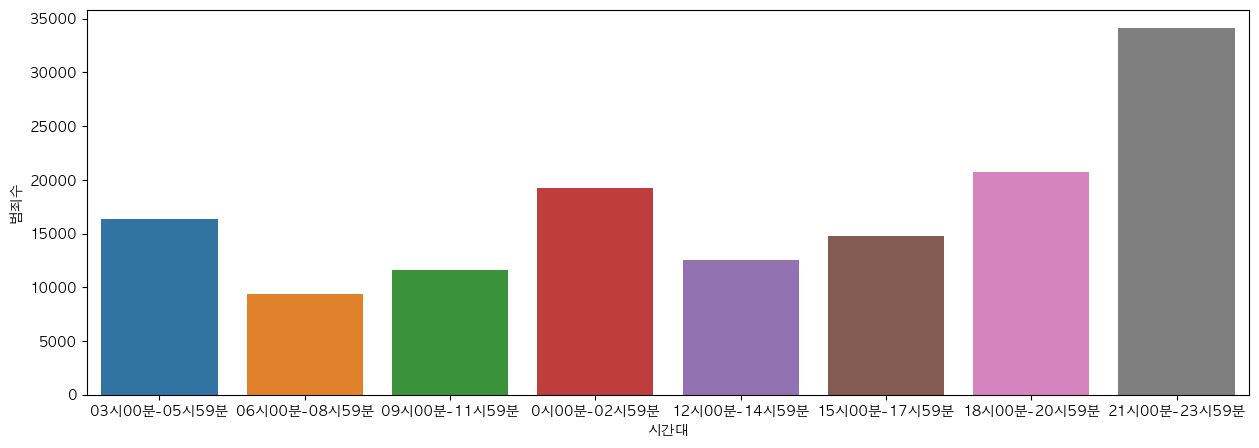

In [104]:
plt.rc("font", family="AppleGothic") #맥을 위한 폰트
plt.figure(figsize=(15,5))
sns.barplot(data=Criminal_Time3)
plt.xlabel("시간대")  
plt.ylabel("범죄수")
plt.show()

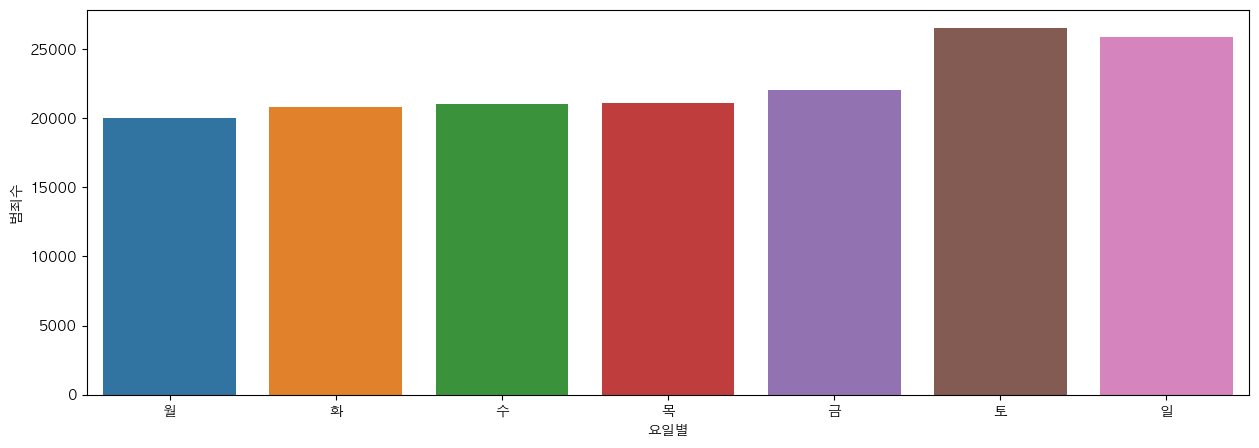

In [105]:
plt.rc("font", family="AppleGothic") #맥을 위한 폰트
plt.figure(figsize=(15,5))
sns.barplot(data=Criminal_Date3)
plt.xlabel("요일별")  
plt.ylabel("범죄수")
plt.show()

In [106]:
#Merge
#시간대 (사기, 배임)
Criminal_Time = pd.concat([Criminal_Time1,Criminal_Time2, Criminal_Time3])

#요일별 (사기, 배임)
Criminal_Date = pd.concat([Criminal_Date1,Criminal_Date2, Criminal_Date3])

display(Criminal_Time)
display(Criminal_Date)

,범죄중분류,03시00분-05시59분,06시00분-08시59분,09시00분-11시59분,0시00분-02시59분,12시00분-14시59분,15시00분-17시59분,18시00분-20시59분,21시00분-23시59분
23,사기,3949,3056,39184,5443,30405,21648,13930,12387
25,배임,4,21,1123,3,277,68,39,8
10,폭행,16377,9345,11591,19226,12509,14791,20704,34120


,범죄중분류,월,화,수,목,금,토,일
23,사기,52740,51876,51225,51654,52039,24124,20814
25,배임,859,730,787,735,905,302,248
10,폭행,19966,20766,20981,21080,22045,26494,25865


In [113]:
Criminal_Date.to_json("요일별범죄.json", index=False, force_ascii=False)
Criminal_Time.to_json("시간별범죄.json", index=False, force_ascii=False)